# 1. Preprocessing Code

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [2]:
columns = [
'duration',
'protocol_type',
'service',
'flag',
'src_bytes',
'dst_bytes',
'land',
'wrong_fragment',
'urgent',
'hot',
'num_failed_logins',
'logged_in',
'num_compromised',
'root_shell',
'su_attempted',
'num_root',
'num_file_creations',
'num_shells',
'num_access_files',
'num_outbound_cmds',
'is_host_login',
'is_guest_login',
'count',
'srv_count',
'serror_rate',
'srv_serror_rate',
'rerror_rate',
'srv_rerror_rate',
'same_srv_rate',
'diff_srv_rate',
'srv_diff_host_rate',
'dst_host_count',
'dst_host_srv_count',
'dst_host_same_srv_rate',
'dst_host_diff_srv_rate',
'dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate',
'dst_host_serror_rate',
'dst_host_srv_serror_rate',
'dst_host_rerror_rate',
'dst_host_srv_rerror_rate',
'Target'
]

In [3]:
data = pd.read_csv('/content/drive/MyDrive/kddcup.data_10_percent_corrected',header=None,names=columns)

In [4]:
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Target
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,tcp,http,SF,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.
494017,0,tcp,http,SF,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.
494018,0,tcp,http,SF,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal.
494019,0,tcp,http,SF,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal.


In [5]:
data.isnull().sum()

,0
duration,0
protocol_type,0
service,0
flag,0
src_bytes,0
dst_bytes,0
land,0
wrong_fragment,0
urgent,0
hot,0


In [6]:
attacks_types = {
'normal': 'normal',
'back': 'dos',
'buffer_overflow': 'u2r',
'ftp_write': 'r2l',
'guess_passwd': 'r2l',
'imap': 'r2l',
'ipsweep': 'probe',
'land': 'dos',
'loadmodule': 'u2r',
'multihop': 'r2l',
'neptune': 'dos',
'nmap': 'probe',
'perl': 'u2r',
'phf': 'r2l',
'pod': 'dos',
'portsweep': 'probe',
'rootkit': 'u2r',
'satan': 'probe',
'smurf': 'dos',
'spy': 'r2l',
'teardrop': 'dos',
'warezclient': 'r2l',
'warezmaster': 'r2l',
}

In [7]:
data['Attack Type'] = data.Target.apply(lambda r: attacks_types[str(r)[:-1]] if isinstance(r, str) else 'unknown')

In [8]:
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,tcp,http,SF,310,1881,0,0,0,0,...,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.,normal
494017,0,tcp,http,SF,282,2286,0,0,0,0,...,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.,normal
494018,0,tcp,http,SF,203,1200,0,0,0,0,...,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal.,normal
494019,0,tcp,http,SF,291,1200,0,0,0,0,...,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal.,normal


#  feature mapping

In [9]:

pmap = {'icmp':0, 'tcp':1, 'udp':2}
data['protocol_type'] = data['protocol_type'].map(pmap)

In [10]:

fmap = {'SF':0, 'S0':1, 'REJ':2, 'RSTR':3, 'RSTO':4, 'SH':5, 'S1':6, 'S2':7, 'RSTOS0':8, 'S3':9, 'OTH':10}
data['flag'] = data['flag'].map(fmap)


# 2.EDA Report

# a.Categorical Features Analysis

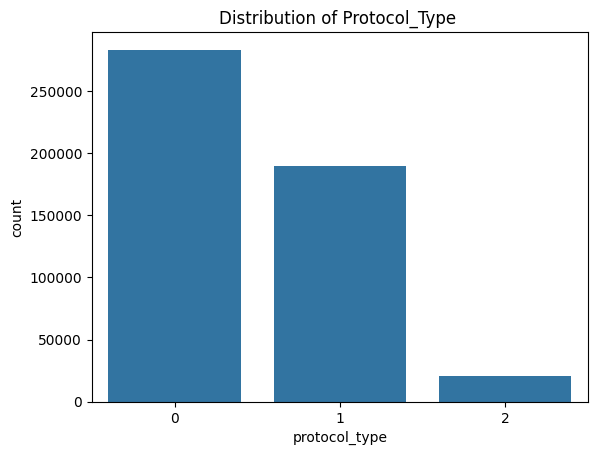

In [ ]:
sns.countplot(x='protocol_type', data=data)
plt.title('Distribution of Protocol_Type ')
plt.show()

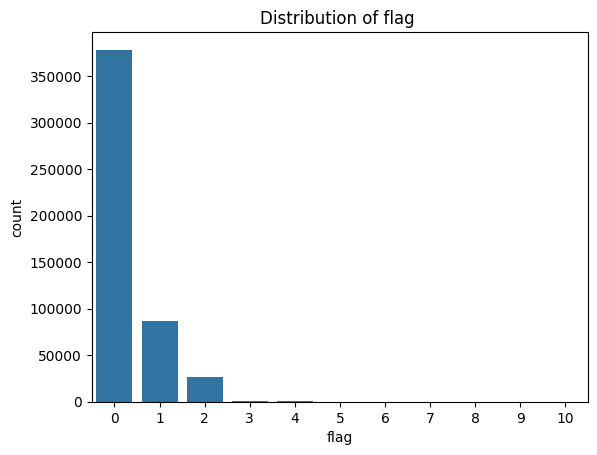

In [ ]:
sns.countplot(x='flag', data=data)
plt.title('Distribution of flag ')
plt.show()

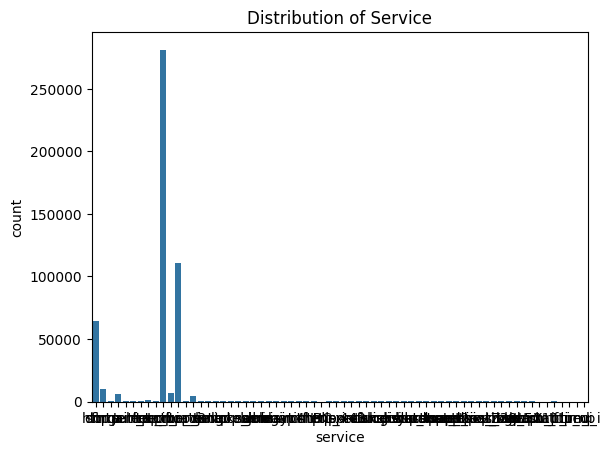

In [ ]:
sns.countplot(x='service', data=data)
plt.title('Distribution of Service')
plt.show()

# b.Distribution of Numeric Features

In [ ]:
sns.histplot(data['src_bytes'])
plt.title('Distribution of Source Bytes')
plt.show()

# c.Correlation Matrix

In [11]:

columns_to_drop = ['flag','protocol_type','flag','Attack Type','Target','service']

corr_data = data.drop(columns_to_drop,axis=1)
corr_matrix = corr_data.corr()
print(corr_matrix)


                             duration  src_bytes  dst_bytes      land  \
duration                     1.000000   0.004258   0.005440 -0.000452   
src_bytes                    0.004258   1.000000  -0.000002 -0.000020   
dst_bytes                    0.005440  -0.000002   1.000000 -0.000175   
land                        -0.000452  -0.000020  -0.000175  1.000000   
wrong_fragment              -0.003235  -0.000139  -0.001254 -0.000318   
urgent                       0.003786  -0.000005   0.016288 -0.000017   
hot                          0.013213   0.004483   0.004365 -0.000295   
num_failed_logins            0.005239  -0.000027   0.049330 -0.000065   
logged_in                   -0.017265   0.001701   0.047814 -0.002784   
num_compromised              0.058095   0.000119   0.023298 -0.000038   
root_shell                   0.021340  -0.000022   0.031680 -0.000070   
su_attempted                 0.055853  -0.000010   0.075656 -0.000031   
num_root                     0.056766  -0.000010   

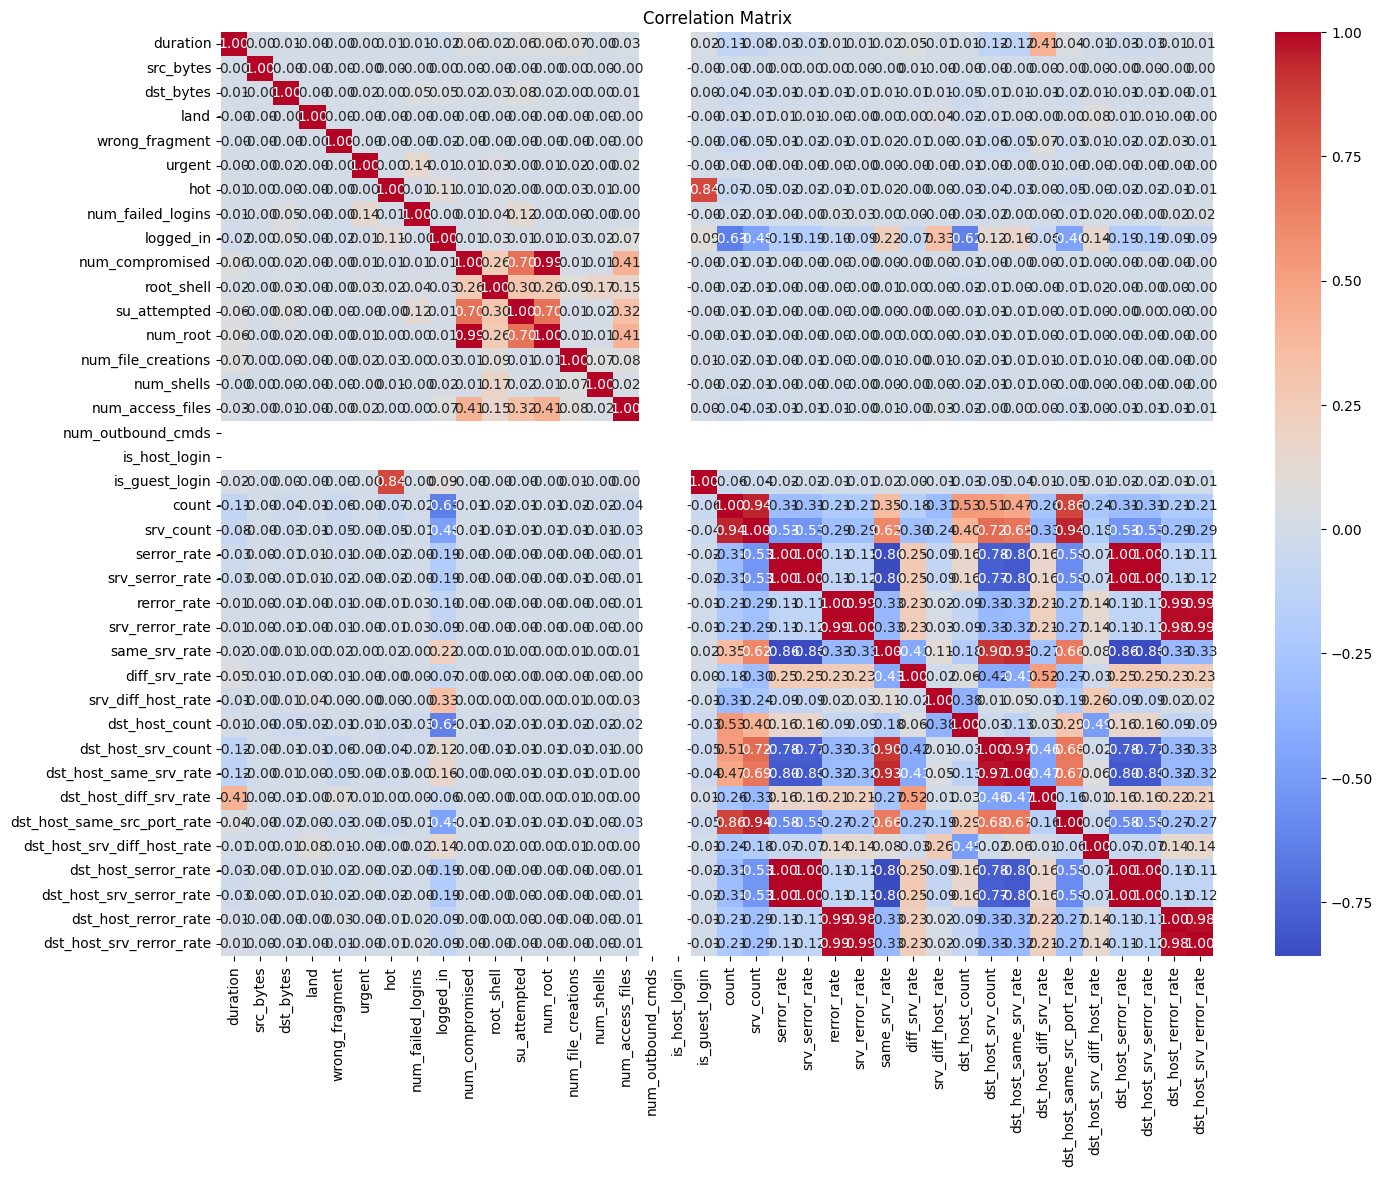

In [12]:
plt.figure(figsize =(16, 12))
sns.heatmap(corr_matrix,annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# d.Relationship Between Features and Target

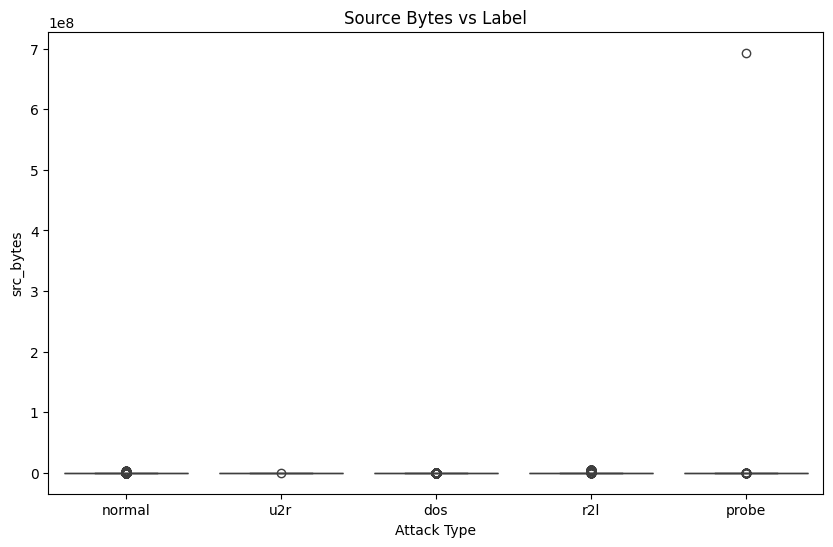

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attack Type', y='src_bytes', data=data)
plt.title('Source Bytes vs Label')
plt.show()

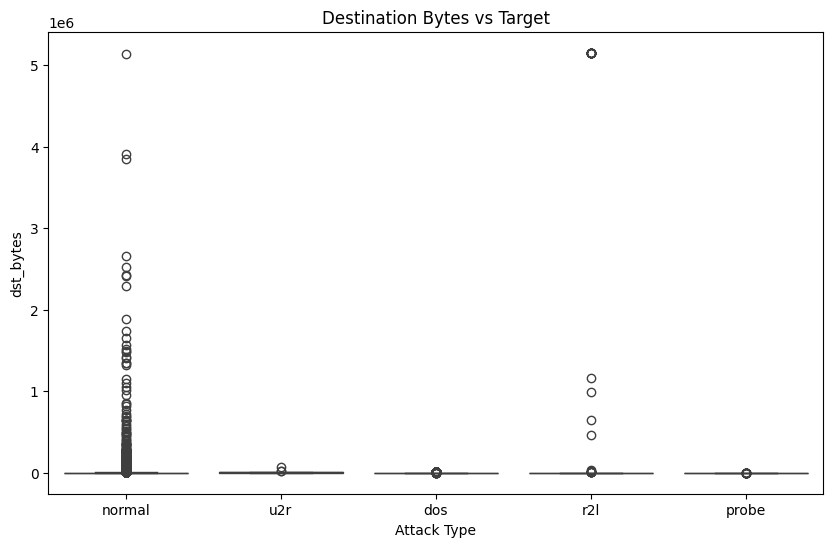

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attack Type', y='dst_bytes', data=data)
plt.title('Destination Bytes vs Target')
plt.show()

# e.Pairwise Relationships

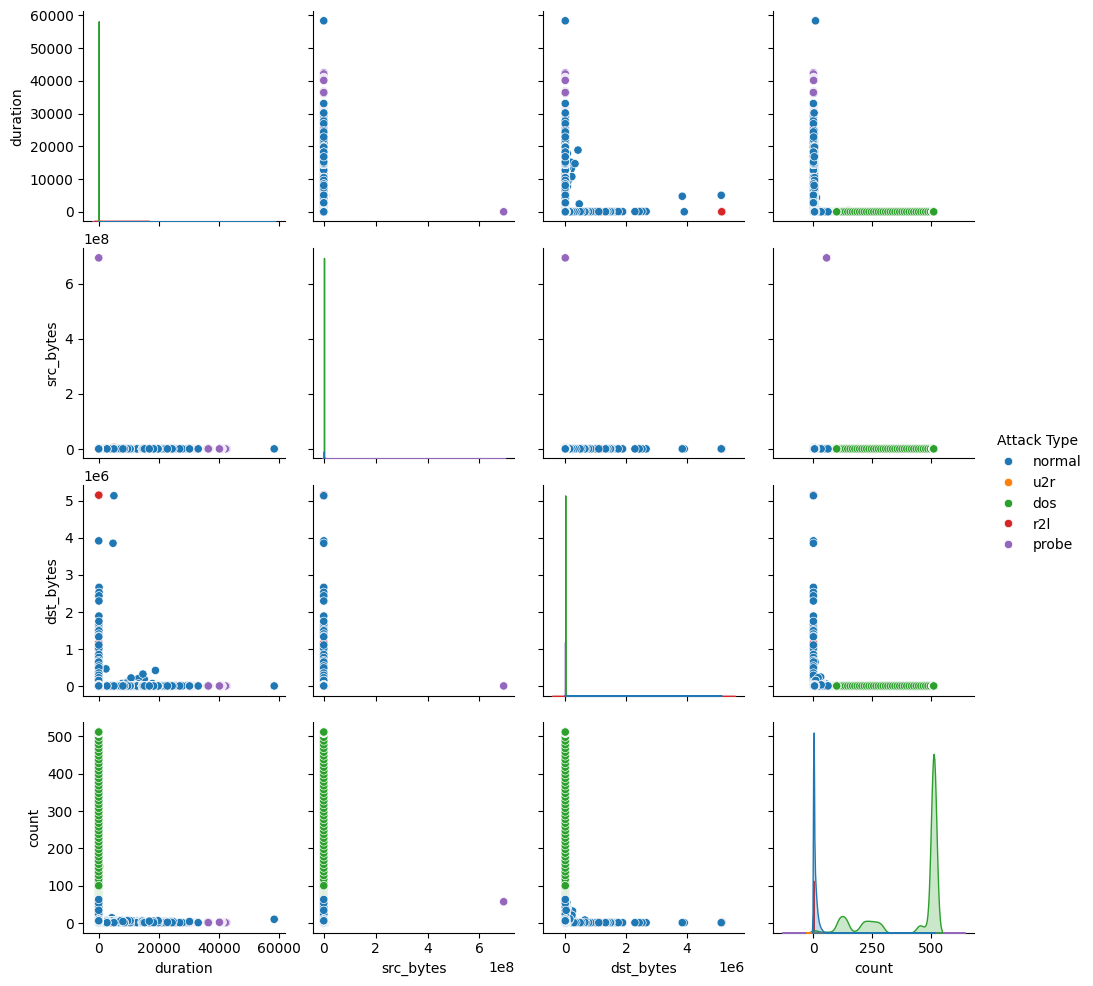

In [15]:
important_features = ['duration', 'src_bytes', 'dst_bytes', 'count', 'Attack Type']
sns.pairplot(data[important_features], hue='Attack Type', diag_kind='kde')
plt.show()

# 3.Model Training Code

In [16]:
data.drop('service', axis = 1, inplace = True) # drop the service columns beacuse this is unblanced columns

# Droping this variable because of multicollinearity

In [17]:
data.drop('num_root', axis = 1, inplace = True)

data.drop('srv_serror_rate', axis = 1, inplace = True)

data.drop('srv_rerror_rate', axis = 1, inplace = True)


data.drop('dst_host_srv_serror_rate', axis = 1, inplace = True)


data.drop('dst_host_serror_rate', axis = 1, inplace = True)


data.drop('dst_host_rerror_rate', axis = 1, inplace = True)

data.drop('dst_host_srv_rerror_rate', axis = 1, inplace = True)


data.drop('dst_host_same_srv_rate', axis = 1, inplace = True)


In [18]:
data.drop('Target',axis=1,inplace=True)

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [20]:
Y = data[['Attack Type']]
X = data.drop(['Attack Type', ], axis = 1)

sc = MinMaxScaler()
X = sc.fit_transform(X)


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 140)

In [21]:
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(395216, 32) (98805, 32)
(395216, 1) (98805, 1)


In [22]:
from sklearn.ensemble import RandomForestClassifier

clfr = RandomForestClassifier(n_estimators = 30)
clfr.fit(X_train,Y_train.values.ravel())

RandomForestClassifier(n_estimators=30)

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score

Y_pred = clfr.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.9997166135317038


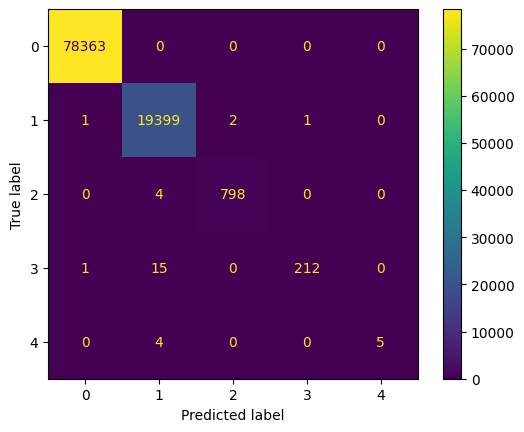

              precision    recall  f1-score   support

         dos       1.00      1.00      1.00     78363
      normal       1.00      1.00      1.00     19403
       probe       1.00      1.00      1.00       802
         r2l       1.00      0.93      0.96       228
         u2r       1.00      0.56      0.71         9

    accuracy                           1.00     98805
   macro avg       1.00      0.90      0.93     98805
weighted avg       1.00      1.00      1.00     98805



In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report
import matplotlib.pyplot as plt

cm = confusion_matrix(Y_test,Y_pred)


disp = ConfusionMatrixDisplay(confusion_matrix=cm)


disp.plot()
plt.show()
print(classification_report(Y_test, Y_pred))

# Cross validation

In [25]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(RandomForestClassifier(),X,Y.values.ravel(),cv=10,scoring='accuracy',))

0.9569268661683091

In [26]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [27]:
rfc = RandomForestClassifier()
gbc=GradientBoostingClassifier()
svc = SVC()
XGBoost_model = XGBClassifier(random_state = 140)

# GradientBoosting

In [28]:
gbc.fit(X_train,Y_train.values.ravel())
y_pred = gbc.predict(X_test)
Accuracy=accuracy_score(Y_test,y_pred)
print("Accuracy:", Accuracy)
print(classification_report(Y_test, y_pred))

Accuracy: 0.999129598704519
              precision    recall  f1-score   support

         dos       1.00      1.00      1.00     78363
      normal       1.00      1.00      1.00     19403
       probe       1.00      0.97      0.98       802
         r2l       0.99      0.85      0.92       228
         u2r       1.00      0.11      0.20         9

    accuracy                           1.00     98805
   macro avg       1.00      0.79      0.82     98805
weighted avg       1.00      1.00      1.00     98805



# Support Vector Machines

In [29]:
svc.fit(X_train,Y_train.values.ravel())
y_pred = svc.predict(X_test)
Accuracy=accuracy_score(Y_test,y_pred)
print("Accuracy:", Accuracy)
print(classification_report(Y_test, y_pred))

Accuracy: 0.9986437933302971
              precision    recall  f1-score   support

         dos       1.00      1.00      1.00     78363
      normal       1.00      1.00      1.00     19403
       probe       1.00      0.97      0.98       802
         r2l       0.84      0.83      0.84       228
         u2r       1.00      0.44      0.62         9

    accuracy                           1.00     98805
   macro avg       0.97      0.85      0.89     98805
weighted avg       1.00      1.00      1.00     98805



# LogisticRegression

In [30]:
LRG = LogisticRegression(max_iter=1200000)
LRG.fit(X_train, Y_train.values.ravel())
Y_pred = LRG.predict(X_test)
Accuracy=accuracy_score(Y_test,y_pred)
print("Accuracy:", Accuracy)
print(classification_report(Y_test, y_pred))

Accuracy: 0.9986437933302971
              precision    recall  f1-score   support

         dos       1.00      1.00      1.00     78363
      normal       1.00      1.00      1.00     19403
       probe       1.00      0.97      0.98       802
         r2l       0.84      0.83      0.84       228
         u2r       1.00      0.44      0.62         9

    accuracy                           1.00     98805
   macro avg       0.97      0.85      0.89     98805
weighted avg       1.00      1.00      1.00     98805



# XGBClassifier

In [31]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)

Y_train_encoded = ohe.fit_transform(Y_train.values.reshape(-1, 1))
Y_test_encoded = ohe.transform(Y_test.values.reshape(-1, 1))

XGBoost = XGBoost_model.fit(X_train, Y_train_encoded.ravel())

predictions = XGBoost_model.predict(X_test)

Accuracy=accuracy_score(Y_test_encoded, predictions)
print("Accuracy:", Accuracy)
print(classification_report(Y_test_encoded,predictions))


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Accuracy: 0.9996558878599261
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     78363
           1       1.00      1.00      1.00     19403
           2       1.00      1.00      1.00       802
           3       1.00      0.95      0.97       228
           4       0.57      0.44      0.50         9

   micro avg       1.00      1.00      1.00     98805
   macro avg       0.91      0.88      0.89     98805
weighted avg       1.00      1.00      1.00     98805
 samples avg       1.00      1.00      1.00     98805



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# ANN

In [32]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


attack_type_mapping = {'normal': 0, 'dos': 1, 'u2r': 2, 'r2l': 3, 'probe': 4}
Y_train_numeric = Y_train['Attack Type'].map(attack_type_mapping)
Y_test_numeric = Y_test['Attack Type'].map(attack_type_mapping)


model.fit(X_train, Y_train_numeric, epochs=20, batch_size=32)


loss, accuracy = model.evaluate(X_test, Y_test_numeric)
print('Test accuracy:', accuracy)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
12351/12351 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - accuracy: 0.9917 - loss: 0.0389
Epoch 2/20
12351/12351 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.9987 - loss: 0.0050
Epoch 3/20
12351/12351 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.9990 - loss: 0.0039
Epoch 4/20
12351/12351 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - accuracy: 0.9990 - loss: 0.0037
Epoch 5/20
12351/12351 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.9991 - loss: 0.0032
Epoch 6/20
12351/12351 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 0.9991 - loss: 0.0033
Epoch 7/20
12351/12351 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.9992 - loss: 0.0029
Epoch 8/20
12351/12351 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - accuracy: 0.9991 - loss: 0.0031
Epoch 9/20
12351/12351 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.9993 - loss: 0.0028
Epoch 10/20
12351/12351 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - accuracy: 0.9992 - loss: 0.0028
Epoch 11/20
12351/12351 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.9993 - loss: 0.00

In [33]:
Y_pred = model.predict(X_test)

3088/3088 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


In [34]:

Y_pred_classes = np.argmax(Y_pred, axis=1)

Accuracy = accuracy_score(Y_test_numeric, Y_pred_classes)
print("Accuracy:", Accuracy)
print(classification_report(Y_test_numeric, Y_pred_classes))

Accuracy: 0.9992308081574819
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19403
           1       1.00      1.00      1.00     78363
           2       0.36      0.44      0.40         9
           3       0.95      0.90      0.93       228
           4       1.00      0.99      0.99       802

    accuracy                           1.00     98805
   macro avg       0.86      0.87      0.86     98805
weighted avg       1.00      1.00      1.00     98805



# ROC-AUC scores all model

In [ ]:
from sklearn.metrics import roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
import numpy as np

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    'XGBoost': XGBClassifier(random_state=140, use_label_encoder=False, eval_metric='logloss'),
    'ANN': Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
}

for model_name, model in models.items():
    if model_name == 'XGBoost':

        le = LabelEncoder()
        y_train_encoded = le.fit_transform(Y_train.values.ravel())
        model.fit(X_train, y_train_encoded)
        y_probs = model.predict_proba(X_test)[:, 1]
    elif model_name == 'ANN':
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        model.fit(X_train, Y_train, epochs=10, batch_size=32, verbose=0)
        y_probs = model.predict(X_test).ravel()

        auc_score = roc_auc_score(Y_test.values.ravel(), y_probs)

        print(f'{model_name} ROC-AUC Score: {auc_score:.4f}')
    else:
        model.fit(X_train, Y_train.values.ravel())
        y_probs = model.predict_proba(X_test)


        if y_probs.ndim == 1:
            y_probs = y_probs.reshape(-1, 1)


        if len(np.unique(Y_test)) > 2:
            auc_score = roc_auc_score(Y_test.values.ravel(), y_probs,multi_class='ovr')
        else:
            auc_score = roc_auc_score(Y_test.values.ravel(), y_probs[:, 1])


        print(f'{model_name} ROC-AUC Score: {auc_score:.4f}')

# **4. Hyperparameter Tuning Results**

# a. GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [ ]:
models = {
    'svm': SVC(),
    'rf': RandomForestClassifier(),
    'lr': LogisticRegression(),
    'gb': GradientBoostingClassifier(),
    'xgb': XGBClassifier()
}

param_grids = {
    'svm': {
        'model__C': [0.1, 1, 10],
        'model__kernel': ['linear', 'rbf']
    },
    'rf': {
        'model__n_estimators': [10, 50, 100],
        'model__max_depth': [None, 10, 20]
    },
    'lr': {
        'model__penalty': ['l1', 'l2'],
        'model__C': [0.1, 1, 10]
    },
    'gb': {
        'model__n_estimators': [50, 100],
        'model__learning_rate': [0.01, 0.1, 0.2],
        'model__max_depth': [3, 5, 7]
    },
    'xgb': {
        'model__n_estimators': [50, 100],
        'model__learning_rate': [0.01, 0.1, 0.2],
        'model__max_depth': [3, 5, 7]
    }
}


In [ ]:
results = []

for model_name, model in models.items():
    pipeline = Pipeline([('model', model)])
    param_grid = param_grids[model_name]

    grid_search = GridSearchCV(estimator=pipeline,
                               param_grid=param_grid,
                               cv=5,
                               scoring='accuracy',
                               n_jobs=-1)

    grid_search.fit(X_train, Y_train.values.ravel())

    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    results.append({
        'model': model_name,
        'best_score': best_score,
        'best_params': best_params
    })

    print(f"Model: {model_name}")
    print(f"Best Score: {best_score}")
    print(f"Best Parameters: {best_params}")
    print()

for result in results:
    print(result)


# RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

param_dist_rf = {
    'n_estimators': randint(100, 300),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'bootstrap': [True, False]
}

param_dist_gb = {
    'n_estimators': randint(100, 300),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.7, 1.0)
}

param_dist_lr = {
    'C': uniform(0.01, 10),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

param_dist_svm = {
    'C': uniform(0.1, 10),
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': randint(2, 5),
    'gamma': ['scale', 'auto']
}

param_dist_xgb = {
    'n_estimators': randint(100, 300),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.5, 1.0),
    'colsample_bytree': uniform(0.5, 1.0)
}

classifiers = {
    "Random Forest": (RandomForestClassifier(random_state=42), param_dist_rf),
    "Gradient Boosting": (GradientBoostingClassifier(random_state=42), param_dist_gb),
    "Logistic Regression": (LogisticRegression(random_state=42), param_dist_lr),
    "Support Vector Machine": (SVC(probability=True, random_state=42), param_dist_svm),
    "XGBoost": (XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss'), param_dist_xgb)
}

for name, (clf, param_dist) in classifiers.items():
    random_search = RandomizedSearchCV(estimator=clf, param_distributions=param_dist, n_iter=50, cv=3, n_jobs=-1, verbose=2, random_state=42)
    random_search.fit(X_train, Y_train)

    print(f"Best parameters found for {name}: {random_search.best_params_}")
    best_model = random_search.best_estimator_

    y_pred = best_model.predict(X_test)
    print(f"Accuracy for {name}: {accuracy_score(Y_test, y_pred)}")
    print(classification_report(Y_test, y_pred))


# 5. Feature Importance Analysis

In [35]:
importances = clfr.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(X.shape[1]):
    print(f"{f + 1}. feature {indices[f]} ({importances[indices[f]]}) - {columns[indices[f]]}")


Feature ranking:
1. feature 4 (0.25899392726678944) - src_bytes
2. feature 20 (0.1851269613457362) - is_host_login
3. feature 10 (0.10486808351530198) - num_failed_logins
4. feature 30 (0.05118511895371436) - srv_diff_host_rate
5. feature 27 (0.05036431922714789) - srv_rerror_rate
6. feature 21 (0.047077058196695866) - is_guest_login
7. feature 1 (0.04591867884464765) - protocol_type
8. feature 31 (0.044145254666568594) - dst_host_count
9. feature 25 (0.035526347601364056) - srv_serror_rate
10. feature 24 (0.029816992721140148) - serror_rate
11. feature 2 (0.024428490155618342) - service
12. feature 22 (0.02164836658083643) - count
13. feature 28 (0.021487704286204407) - same_srv_rate
14. feature 26 (0.020432253108799182) - rerror_rate
15. feature 29 (0.01599833954808162) - diff_srv_rate
16. feature 3 (0.012867739791741098) - flag
17. feature 8 (0.00910674798422283) - urgent
18. feature 0 (0.0061199472247003995) - duration
19. feature 6 (0.005133822126342916) - land
20. feature 11 (0.0

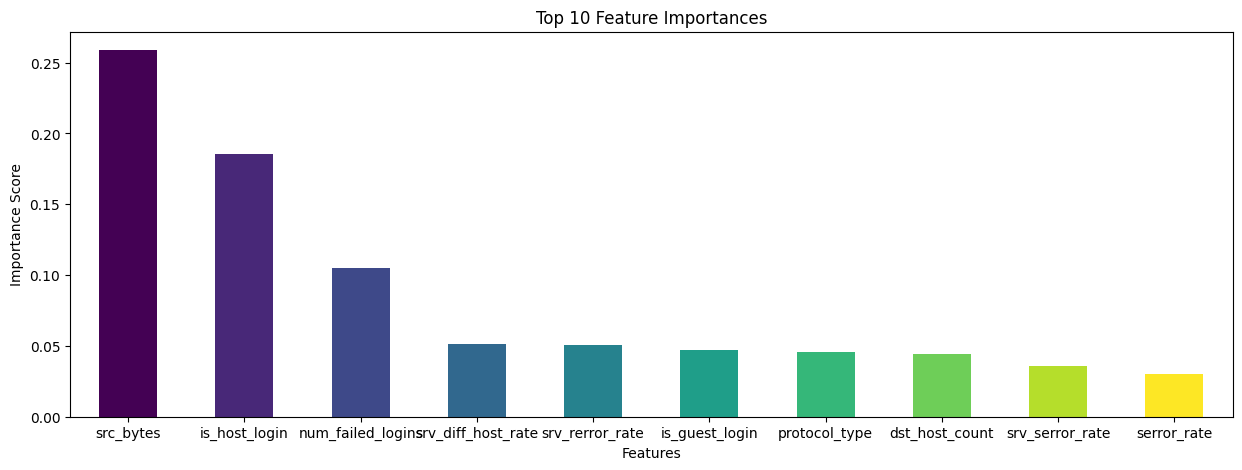

In [36]:
importances = clfr.feature_importances_
indices = np.argsort(importances)[::-1]
important_features = pd.Series(importances[indices], index=[columns[i] for i in indices])

plt.figure(figsize=(15, 5))
important_features.head(10).plot(kind='bar', title='Top 10 Feature Importances', align='center',color=plt.cm.viridis(np.linspace(0, 1, 10)))
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.xticks(rotation=0)
plt.show()


# **6. Model Comparison Report**

## Compare the performance of among those model 'RF', 'GB', 'SVM', 'LR','XGB','ANN'

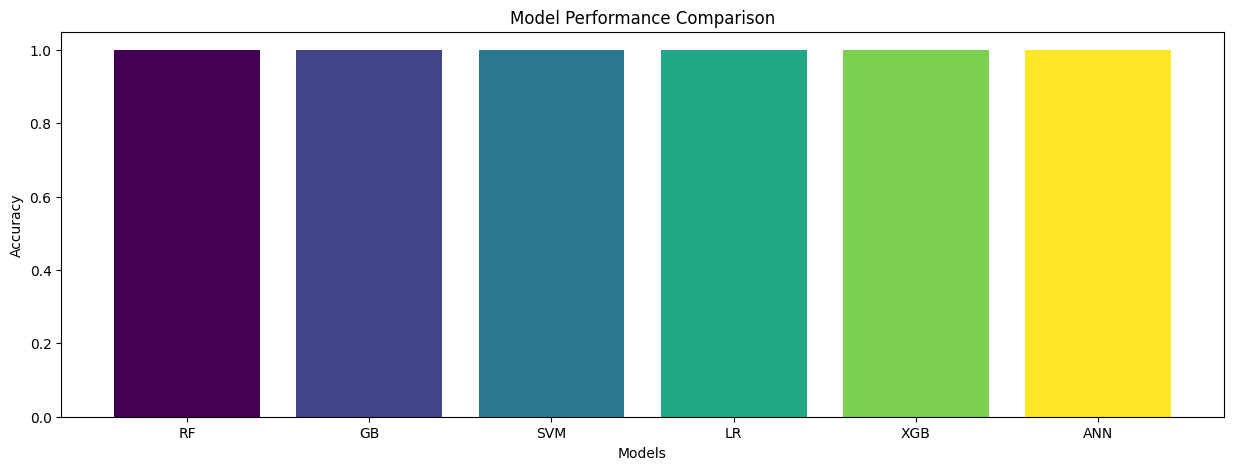

In [37]:
import matplotlib.pyplot as plt
names = ['RF', 'GB', 'SVM', 'LR', 'XGB', 'ANN']
values = [0.9997166135317038, 0.999129598704519, 0.9986437933302971, 0.9986437933302971, 0.9996558878599261, 0.9992308081574819]

plt.figure(figsize=(15, 5), num=10)

colors = plt.cm.viridis(np.linspace(0, 1, len(values)))
plt.bar(names, values, color=colors)

plt.title('Model Performance Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')

plt.show()

# 7. Implementation Plan: Discuss how you would implement the model in a real-time system.  


# Other theory parts write on docs file  , so open this  docs file